In [94]:
%load_ext autoreload
%autoreload 2
import numpy as np
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')

from graph_utils import *
from performance_utils import *
from metropolis import *
from houdayer_algorithm import *
from sim_util import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Specs:
  Number of nodes (N) = 500
  Degree of graph (d) = 5
  Intra-group connect param (a) = 9.09090909090909
  Inter-group connect param (b) = 0.9090909090909091
  Group connect ratio (r) = b/a = 0.1
  Critical ratio (rc) = 0.38196601125010515 (for detectable communities)


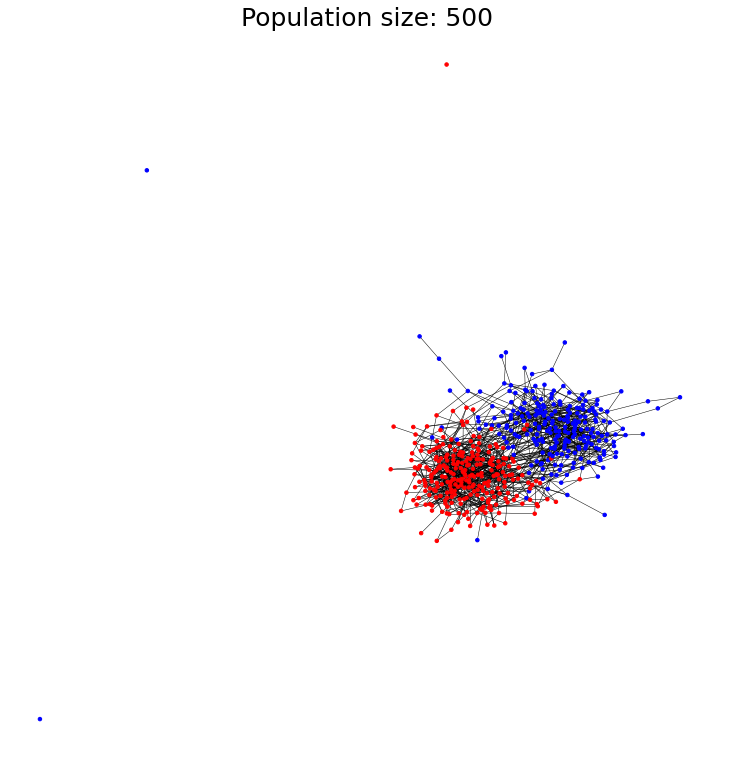

In [95]:
# Initialize random seed
np.random.seed(0)

# Define the parameters
N = 500      # number of nodes
d = 5       # degree

# Generate the basic parameters for simulation
a, b, r = generate_detectable_a_b(d, r=0.1)
display_spec(N,d,a,b,r)

true_group_label = generate_population(N)
G = graph_gen(true_group_label, a, b)

draw_graph(G, true_group_label)

## Start Simulation

In [96]:
adj = nx.to_numpy_array(G)
x_pred = predict(adj, a, b, true_group_label, sim_num=5)
compute_overlap(x_pred, true_group_label)

Sim - 1
Itr = 100000; Convergence index = 0.0174
Overlap = 0.912
Sim - 2
Itr = 100000; Convergence index = 0.0130
Overlap = 0.924
Sim - 3
Itr = 100000; Convergence index = 0.0163
Overlap = 0.936
Sim - 4
Itr = 100000; Convergence index = 0.0146
Overlap = 0.94
Sim - 5
Itr = 100000; Convergence index = 0.0237
Overlap = 0.916


0.912

In [27]:
# Initialize the vector to start searching
x1_init, x2_init = generate_population(N), generate_population(N)
# Obtain the adjacency matrix
Adj = nx.to_numpy_array(G)

chain_1 = Metropolis(Adj, a, b, x1_init)
chain_2 = Metropolis(Adj, a, b, x2_init)

In [30]:
chain_1.reset();chain_2.reset()
m_steps = 1
h_steps = 0
num_iter = 100000
num_sims = 10

total_ov1 = np.zeros(num_iter)
total_ov2 = np.zeros(num_iter)
for s in tqdm(range(num_sims)):
    chain_1.reset();chain_2.reset()
    ov1, ov2, t = sim_one_round(G, chain_1, chain_2, true_group_label, num_iter, m_steps, h_steps)
    total_ov1 += ov1
    total_ov2 += ov2
total_ov1 /= num_sims
total_ov2 /= num_sims
average_size = 101

100%|██████████| 10/10 [00:51<00:00,  5.16s/it]


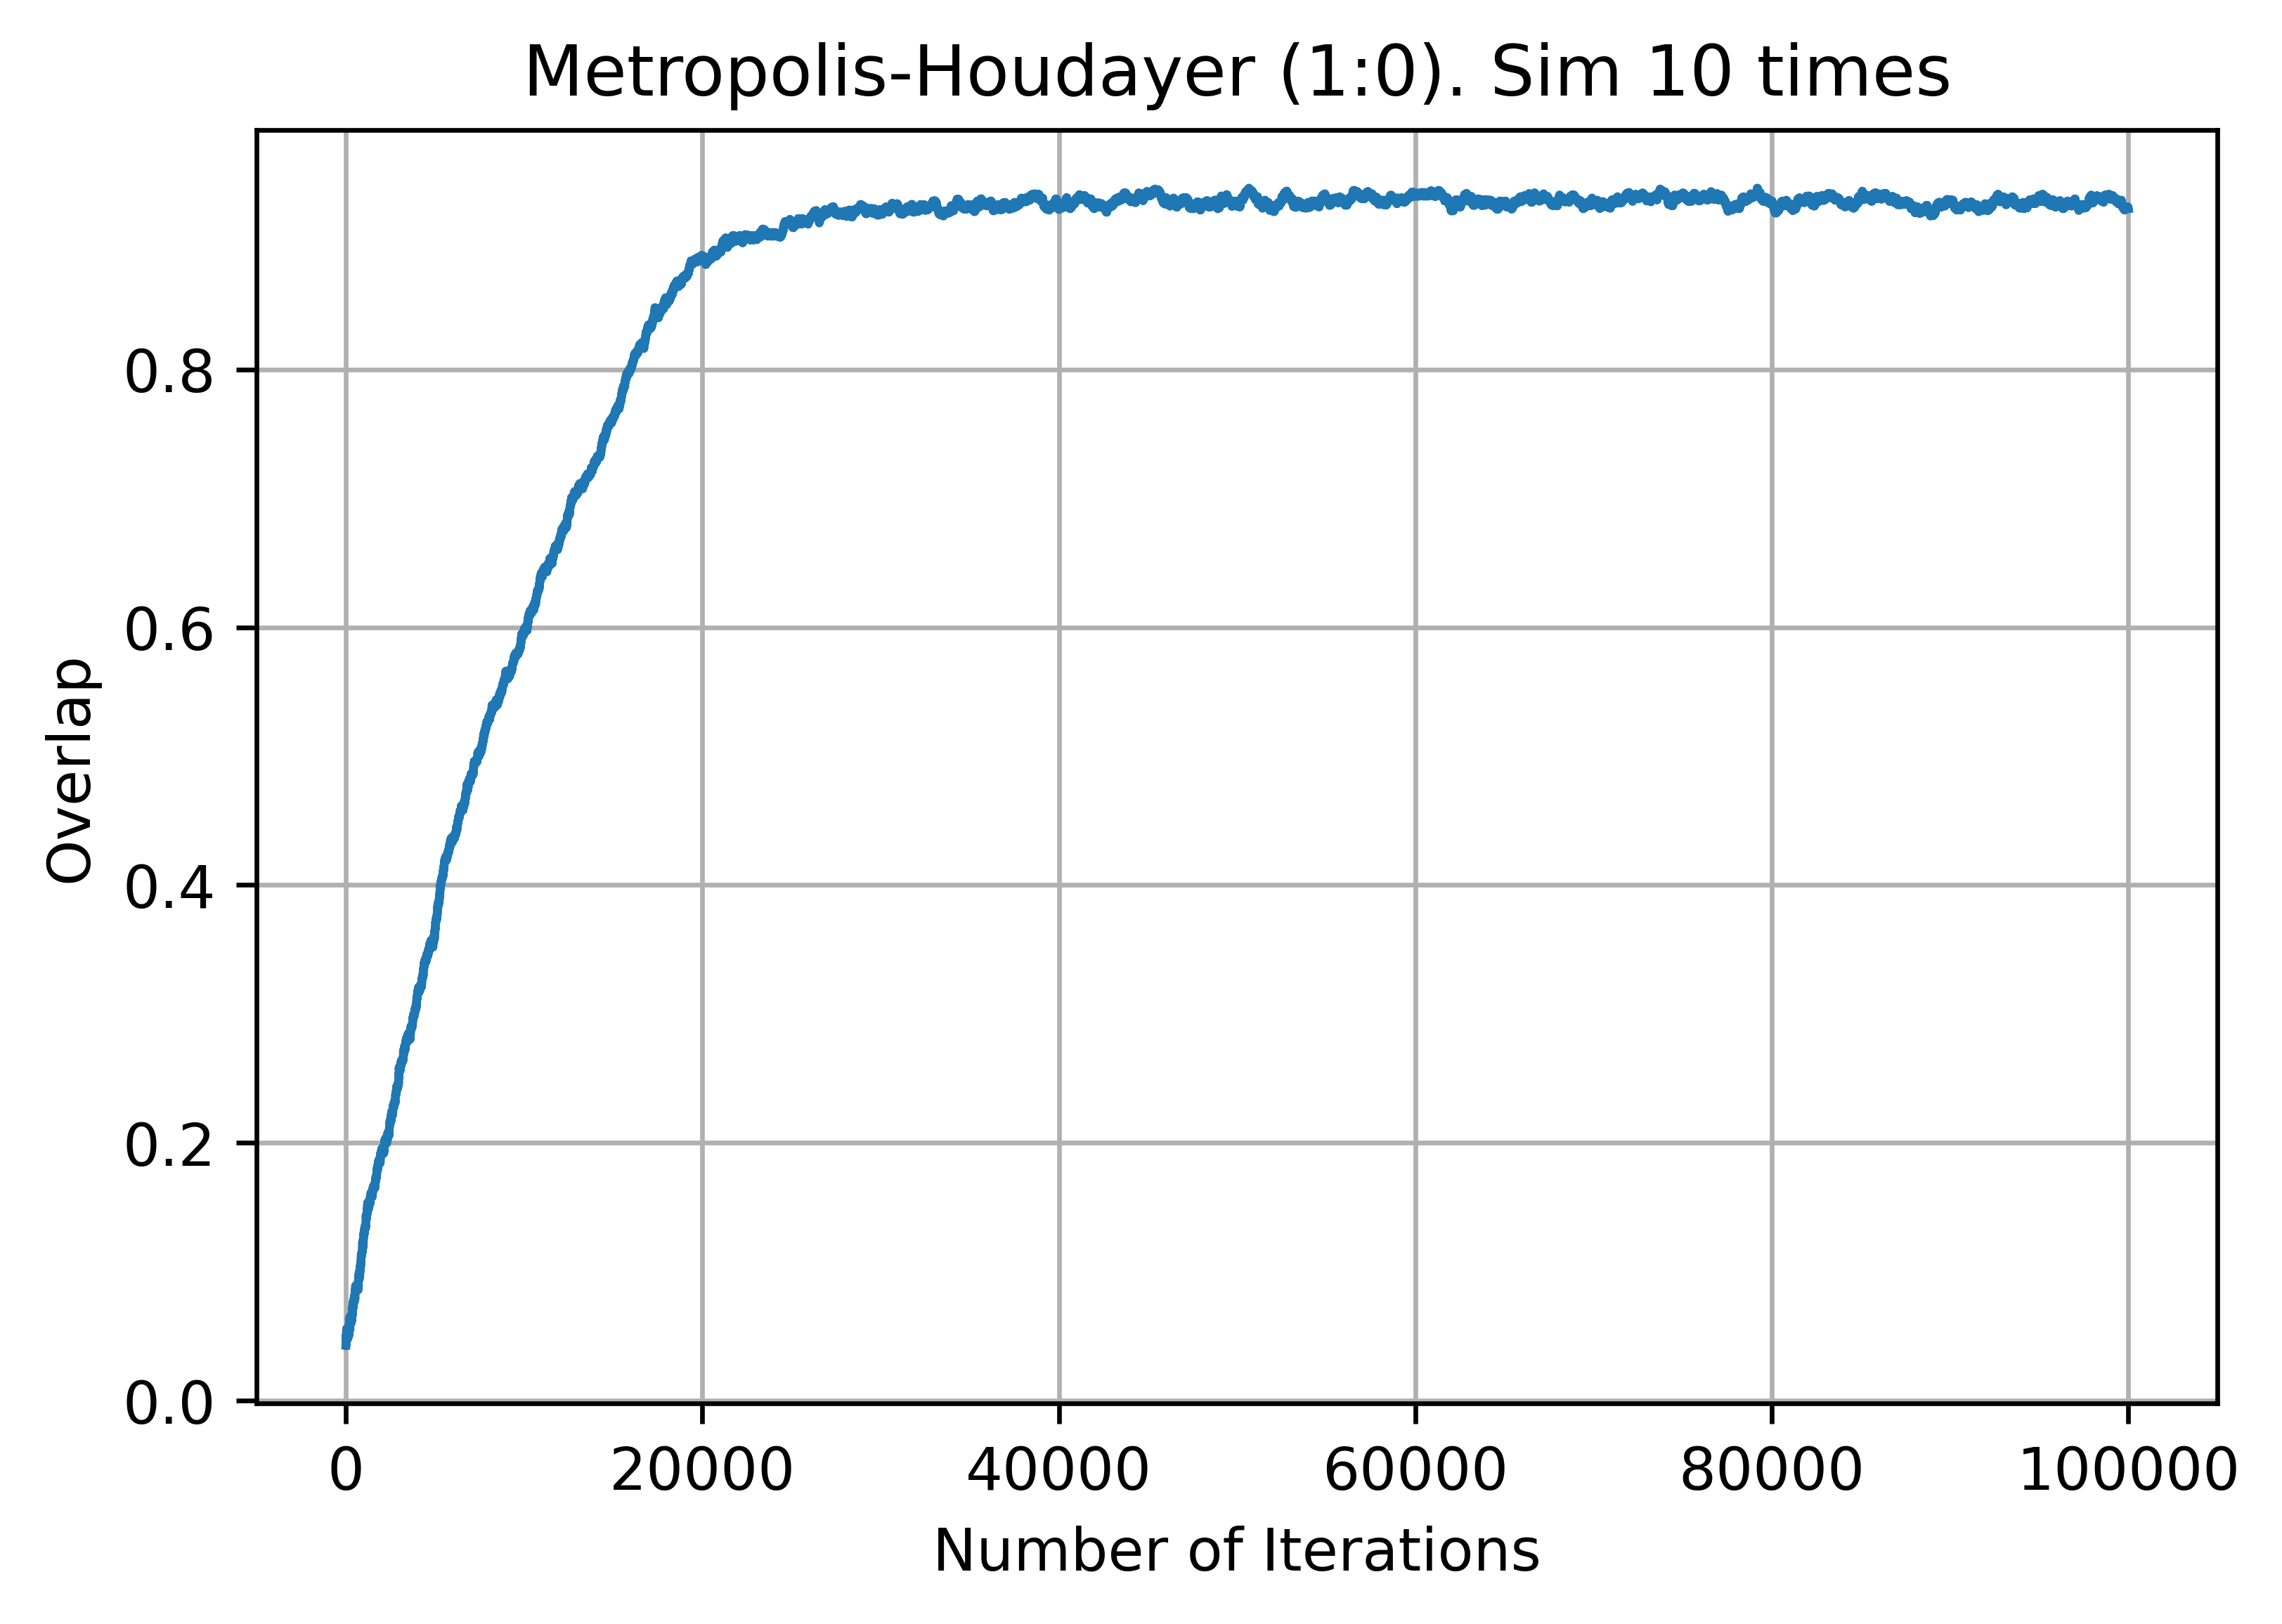

In [31]:
plot_sim(x=t,
         y=total_ov1,
         title=f'Metropolis-Houdayer ({m_steps}:{h_steps}). Sim {num_sims} times',
         x_label='Number of Iterations',
         y_label='Overlap' )